In [141]:
%reload_ext autoreload
%autoreload 2

from pathlib import Path
import sys 

project_root = Path().cwd()
scripts_dir = project_root / "src" / "scripts"
sys.path.insert(0, str(scripts_dir))

import numpy as np 
import scipy.stats as stats
import scipy.io as io
import os 
import matplotlib.pyplot as plt 
import seaborn as sns
import process_2p as p2p
import lick_behav_analysis as behav

#Recording parameters
fps = 15
framespertrial = 375 
ms_per_frame = int(1000//fps)
reward_frame = 150
cue_frame = 105
trials = 30
cmap= "coolwarm"

In [23]:
p2p

<module 'process_2p' from '/Users/savani/Documents/PangLab/TwoPhotonAnalysis/src/scripts/process_2p.py'>

In [145]:
folder = '/Users/savani/Downloads/2p_data/fasted 30 sucrose'
all_avg_f, all_baseline_data, all_aligned_f = p2p.process_2p_folder(folder, align = 'lick', success = 'success')

Text(0.5, 25.722222222222214, 'Time from First Lick')

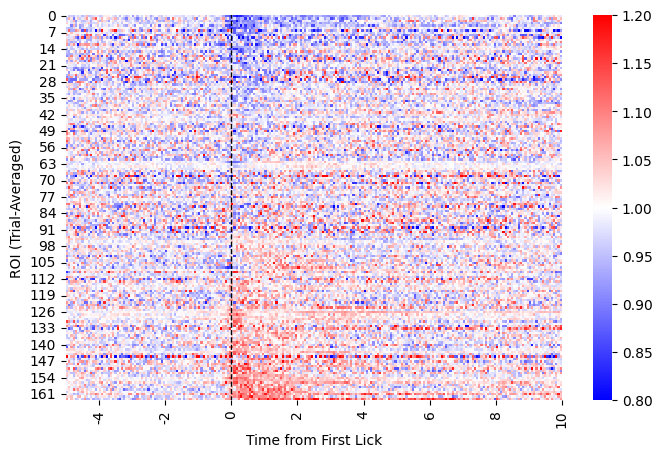

In [148]:
fig, ax = plt.subplots(1, figsize=(8, 5))
ascending_order = np.argsort(np.nanmean(all_avg_f[:, 75:105], axis=1))
sorted_avg_mean = all_avg_f[ascending_order, :]
sns.heatmap(sorted_avg_mean, ax = ax, vmin=0.8, vmax=1.2, cmap='bwr')
ax.vlines(x = 75, ymin = -1, ymax = all_avg_f.shape[0] + 1, color = 'black', linestyle = '--', lw = 1)
ax.set_xticks(np.arange(15, 255, 15)[::2])
ax.set_xticklabels((np.arange(15, 255, 15)/15).astype(int)[::2]-5)
ax.set_ylabel("ROI (Trial-Averaged)")
ax.set_xlabel("Time from First Lick")